In [1]:
import requests as r
from dotenv import load_dotenv
load_dotenv()
import os
key = os.getenv("RIOTKEY")
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
username = "idashhe"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36",
    "Accept-Language": "en-GB,en-US;q=0.9,en;q=0.8",
    "Accept-Charset": "application/x-www-form-urlencoded; charset=UTF-8",
    "Origin": "https://developer.riotgames.com",
    "X-Riot-Token": key
}

In [15]:
response = r.get(f"https://na1.api.riotgames.com/lol/summoner/v4/summoners/by-name/{username}",headers=headers)
body = response.json()
puuid = body["puuid"]
print(puuid)

OAZVEmbLTrBSLLkjJes4AbQXlua8fT89_gCkNZiRzDDKWj_7IHew4gxMen7gILrQJgFebehnKcU2yA


In [132]:
response = r.get(f"https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids?start=0&count=100&type=ranked",headers=headers)
matches = response.json()

In [134]:
all_participant_data = []
all_timelines = []
for match in matches:
    try:
        response = r.get(f"https://americas.api.riotgames.com/lol/match/v5/matches/{match}",headers=headers)
        match_data = response.json()
        participants = pd.DataFrame(match_data["info"]["participants"])[["participantId","summonerName","individualPosition","teamId"]]
        participants["match"] = match
        all_participant_data.append(participants)
        response = r.get(f"https://americas.api.riotgames.com/lol/match/v5/matches/{match}/timeline",headers=headers)
        timeline = response.json()
        actions = []
        for frame in timeline["info"]["frames"]:
            actions.extend(frame["events"])
        example_timeline = pd.DataFrame(actions)
        example_timeline["match"] = match
        all_timelines.append(example_timeline)
    except Exception as e:
        print(str(e))

'info'
'info'
'info'
'info'
'info'
'info'
'info'
'info'
'info'
'info'
'info'
'info'
'info'
'info'
'info'
'info'
'info'
'info'
'info'
'info'
'info'
'info'
'info'
'info'
'info'
'info'
'info'
'info'
'info'
'info'
'info'
'info'
'info'
'info'
'info'
'info'
'info'
'info'


KeyboardInterrupt: 

In [2]:
match_parts = pd.concat(all_participant_data)
match_time = pd.concat(all_timelines)

NameError: name 'all_participant_data' is not defined

In [110]:
match_time.iloc[150:200][["type","position"]]

,type,position
150,ITEM_DESTROYED,NaN
151,LEVEL_UP,NaN
152,SKILL_LEVEL_UP,NaN
153,LEVEL_UP,NaN
154,SKILL_LEVEL_UP,NaN
155,WARD_PLACED,NaN
156,LEVEL_UP,NaN
157,SKILL_LEVEL_UP,NaN
158,LEVEL_UP,NaN
159,SKILL_LEVEL_UP,NaN


In [3]:
match_parts = pd.read_csv("match_participants.csv")
match_time = pd.read_csv("match_time.csv")

C:\Users\eric\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (37) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
kills = match_time[match_time["type"]=="CHAMPION_KILL"]

In [5]:
relevant = []
for col in kills.columns:
    if len([x for x in kills[col].isna() if x]) < 1:
        relevant.append(col)
cleaned = kills[relevant]

In [11]:
cleaned["position"]

51       {'x': 11366, 'y': 6919}
55       {'x': 11698, 'y': 7042}
56       {'x': 11241, 'y': 7560}
98        {'x': 6791, 'y': 7086}
110      {'x': 5130, 'y': 11517}
                  ...           
57657     {'x': 2827, 'y': 2399}
57744     {'x': 2223, 'y': 7368}
57760     {'x': 1285, 'y': 2912}
57763      {'x': 784, 'y': 2453}
57777     {'x': 1998, 'y': 1980}
Name: position, Length: 3427, dtype: object

In [13]:
cleaned["x"] = [int(x.split(",")[0].split(":")[1].strip()) for x in cleaned["position"]]
cleaned["y"] = [int(x.split(",")[1].split(":")[1].strip()[:-1]) for x in cleaned["position"]]

C:\Users\eric\AppData\Local\Temp/ipykernel_13224/2607827429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["x"] = [int(x.split(",")[0].split(":")[1].strip()) for x in cleaned["position"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_13224/2607827429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["y"] = [int(x.split(",")[1].split(":")[1].strip()[:-1]) for x in cleaned["position"]]


In [16]:
roles = []
teams = []
ismyteams = []
for row in cleaned.iterrows():
    try:
        killerId = int(row[1]["killerId"])
        match = row[1]["match"]
        da_match = match_parts[(match_parts["match"]==match) & (match_parts["participantId"]==killerId)].iloc[0]
        role = da_match["individualPosition"]
        team = da_match["teamId"]
        my_team = match_parts[(match_parts["match"]==match) & (match_parts["summonerName"]=="idashhe")].iloc[0]["teamId"]
        ismyteam = team == my_team
        roles.append(role)
        teams.append(team)
        ismyteams.append(ismyteam)
    except:
        roles.append("idk")
        teams.append("idk")
        ismyteams.append("idk")
cleaned["killerRole"] = roles
cleaned["killerTeam"] = teams
cleaned["killerismyteam"] = ismyteams
roles = []
teams = []
for row in cleaned.iterrows():
    try:
        killerId = int(row[1]["victimId"])
        match = row[1]["match"]
        da_match = match_parts[(match_parts["match"]==match) & (match_parts["participantId"]==killerId)].iloc[0]
        role = da_match["individualPosition"]
        team = da_match["teamId"]
        roles.append(role)
        teams.append(team)
    except:
        roles.append("idk")
        teams.append("idk")
cleaned["victimRole"] = roles
cleaned["victimTeam"] = teams

C:\Users\eric\AppData\Local\Temp/ipykernel_13224/1436438467.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["killerRole"] = roles
C:\Users\eric\AppData\Local\Temp/ipykernel_13224/1436438467.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["killerTeam"] = teams
C:\Users\eric\AppData\Local\Temp/ipykernel_13224/1436438467.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [150]:
cleaned.to_csv("kills")

In [21]:
cleaned["count"] = 1

C:\Users\eric\AppData\Local\Temp/ipykernel_13224/826903056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["count"] = 1


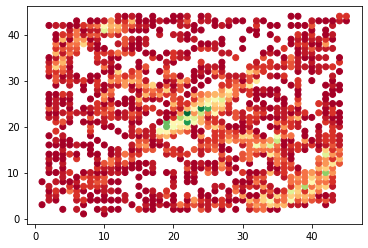

In [103]:
rounding_value = 2.5
viz = cleaned.copy()
viz["x_rounded"] = [int(x / (10 ** rounding_value)) for x in viz["x"]]
viz["y_rounded"] = [int(x / (10 ** rounding_value)) for x in viz["y"]]
summarized = viz.groupby(["x_rounded","y_rounded"]).sum().reset_index()
plt.scatter(summarized["x_rounded"],summarized["y_rounded"],c=summarized["count"],cmap="RdYlGn")

In [22]:
early_game = cleaned[cleaned["timestamp"]<=600000]

In [59]:
early_game

,Unnamed: 0,timestamp,type,bounty,killStreakLength,killerId,position,shutdownBounty,victimDamageReceived,victimId,match,x,y,killerRole,killerTeam,killerismyteam,victimRole,victimTeam,count
51,51,118908,CHAMPION_KILL,400.0,0.0,10.0,"{'x': 11366, 'y': 6919}",0.0,"[{'basic': True, 'magicDamage': 0, 'name': 'SR...",2.0,NA1_4243988855,11366,6919,UTILITY,200,True,JUNGLE,100,1
55,55,123003,CHAMPION_KILL,300.0,0.0,4.0,"{'x': 11698, 'y': 7042}",0.0,"[{'basic': True, 'magicDamage': 0, 'name': 'SR...",10.0,NA1_4243988855,11698,7042,BOTTOM,100,False,UTILITY,200,1
56,56,125480,CHAMPION_KILL,300.0,0.0,9.0,"{'x': 11241, 'y': 7560}",0.0,"[{'basic': False, 'magicDamage': 105, 'name': ...",4.0,NA1_4243988855,11241,7560,BOTTOM,200,True,BOTTOM,100,1
98,98,205880,CHAMPION_KILL,300.0,0.0,8.0,"{'x': 6791, 'y': 7086}",0.0,"[{'basic': False, 'magicDamage': 68, 'name': '...",3.0,NA1_4243988855,6791,7086,MIDDLE,200,True,MIDDLE,100,1
110,110,221039,CHAMPION_KILL,300.0,0.0,1.0,"{'x': 5130, 'y': 11517}",0.0,"[{'basic': False, 'magicDamage': 0, 'name': 'V...",7.0,NA1_4243988855,5130,11517,TOP,100,False,JUNGLE,200,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56870,291,500971,CHAMPION_KILL,300.0,1.0,6.0,"{'x': 13081, 'y': 2350}",0.0,"[{'basic': True, 'magicDamage': 0, 'name': 'Ji...",4.0,NA1_4237685070,13081,2350,TOP,200,True,BOTTOM,100,1
56885,306,519238,CHAMPION_KILL,300.0,1.0,3.0,"{'x': 11870, 'y': 1958}",0.0,"[{'basic': False, 'magicDamage': 62, 'name': '...",9.0,NA1_4237685070,11870,1958,MIDDLE,100,False,BOTTOM,200,1
56891,312,526109,CHAMPION_KILL,300.0,2.0,3.0,"{'x': 13794, 'y': 3655}",300.0,"[{'basic': False, 'magicDamage': 0, 'name': 'A...",10.0,NA1_4237685070,13794,3655,MIDDLE,100,False,UTILITY,200,1
56910,331,552323,CHAMPION_KILL,300.0,0.0,1.0,"{'x': 4009, 'y': 9769}",0.0,"[{'basic': True, 'magicDamage': 0, 'name': 'SR...",7.0,NA1_4237685070,4009,9769,TOP,100,False,JUNGLE,200,1


In [85]:
role = "JUNGLE"
rounding_value = 2
jungle_path = early_game[(early_game["killerRole"]==role) & (early_game["killerismyteam"]==False)].copy()
jungle_path["x_rounded"] = [int(x / (10 ** rounding_value)) for x in jungle_path["x"]]
jungle_path["y_rounded"] = [int(x / (10 ** rounding_value)) for x in jungle_path["y"]]
summarized = jungle_path.groupby(["x_rounded","y_rounded"]).sum().reset_index()

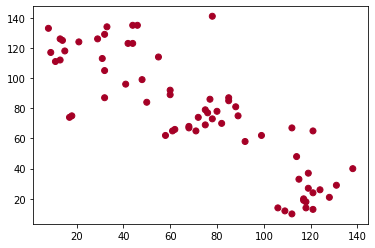

In [86]:
plt.scatter(summarized["x_rounded"],summarized["y_rounded"],c=summarized["count"],cmap="RdYlGn")

In [87]:
summarized

,x_rounded,y_rounded,Unnamed: 0,timestamp,bounty,killStreakLength,killerId,shutdownBounty,victimId,x,y,victimTeam,count
0,8,133,116,219987,300.0,0.0,7.0,0.0,1.0,876,13354,100,1
1,9,117,127,229988,300.0,0.0,2.0,0.0,7.0,958,11734,200,1
2,11,111,166,279348,300.0,1.0,7.0,150.0,1.0,1110,11101,100,1
3,13,112,363,476593,300.0,0.0,2.0,0.0,6.0,1389,11206,200,1
4,13,126,98,181763,300.0,0.0,2.0,0.0,6.0,1396,12684,200,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,121,65,234,374681,300.0,0.0,7.0,50.0,2.0,12123,6554,100,1
62,124,26,254,543548,300.0,0.0,2.0,0.0,9.0,12444,2677,200,1
63,128,21,262,351354,300.0,0.0,7.0,0.0,4.0,12854,2177,100,1
64,131,29,107,162246,300.0,0.0,2.0,0.0,9.0,13125,2925,200,1


In [302]:
roles = early_game["killerRole"].unique()
match_analysises = []
for match in early_game["match"].unique():
    match_data = early_game[early_game["match"]==match]
    for role in roles:
        match_analysis = {}
        my_team_role_kill_count = match_data[(match_data["killerismyteam"]==True) & \
                                             (match_data["killerRole"]==role)].index.size
        enemy_team_role_kill_count = match_data[(match_data["killerismyteam"]==False) & \
                                             (match_data["killerRole"]==role)].index.size
        match_analysis[f"my_team_kc"] = my_team_role_kill_count
        match_analysis[f"enemy_team_kc"] = enemy_team_role_kill_count
        match_analysis["role"] = role
        match_analysis["match"] = match
        match_analysises.append(match_analysis)

In [303]:
manalysis = pd.DataFrame(match_analysises)
manalysis["advantage"] = manalysis["my_team_kc"] >= manalysis["enemy_team_kc"]
manalysis["quant_advantage"] = manalysis["my_team_kc"] - manalysis["enemy_team_kc"]

In [310]:
role = "MIDDLE"
role_manalysis = manalysis[manalysis["role"]==role]
adcount = role_manalysis[role_manalysis["advantage"]==True].index.size
disadcount = role_manalysis[role_manalysis["advantage"]==False].index.size
quantad = role_manalysis["quant_advantage"].mean()
print(adcount,disadcount,quantad)

48 9 0.08771929824561403


In [226]:
highlevel = manalysis.groupby("match").sum().reset_index()
highlevel

,match,my_team_kc,enemy_team_kc,advantage
0,NA1_4237685070,19,12,7
1,NA1_4237835278,18,10,8
2,NA1_4237900871,10,10,0
3,NA1_4237927501,18,12,6
4,NA1_4237934566,6,15,-9
5,NA1_4238042350,23,14,9
6,NA1_4238044206,17,4,13
7,NA1_4238058357,8,9,-1
8,NA1_4238090110,11,16,-5
9,NA1_4238095548,20,9,11


In [213]:
early_game[(early_game["killerismyteam"]==False) & (early_game["killerRole"]=="TOP")].index.size

94

In [207]:
early_game[(early_game["killerismyteam"]==True) & ((early_game["killerRole"]=="BOTTOM") | (early_game["killerRole"]=="UTILITY"))].index.size

353

In [208]:
early_game[(early_game["killerismyteam"]==False) & ((early_game["killerRole"]=="BOTTOM") | (early_game["killerRole"]=="UTILITY"))].index.size

334